In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

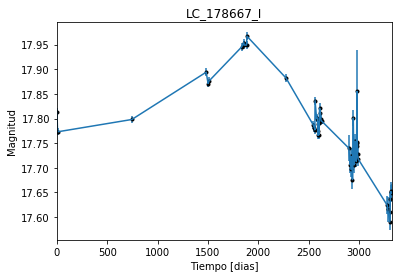

In [2]:
data = np.genfromtxt('LC_178667_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_178667_I')
plt.savefig("LC_178667_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

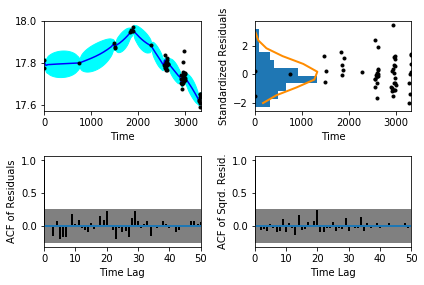

In [5]:
sample.assess_fit()

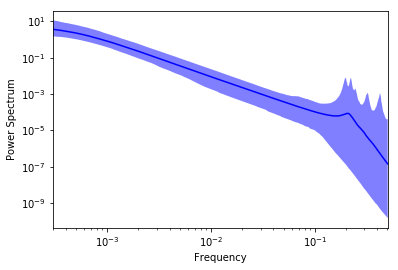

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

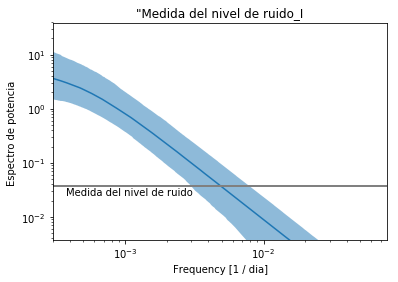

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_178667_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_178667_I')

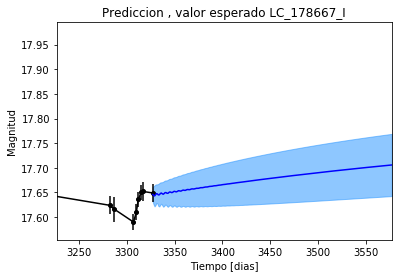

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_178667_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_178667_I')

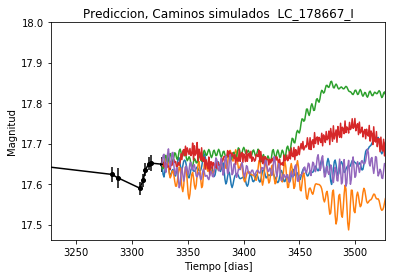

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_178667_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


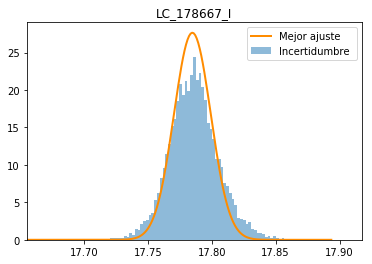

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_178667_I')
plt.savefig("Mejor_ajuste_LC_178667_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_178667_I')

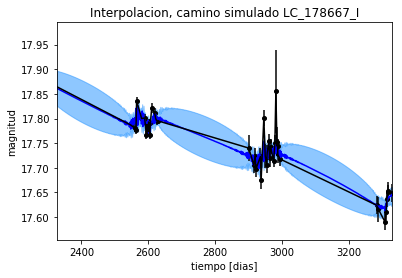

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_178667_I')

Text(0.5,1,'Interpolacion, camino simulado LC_178667_I')

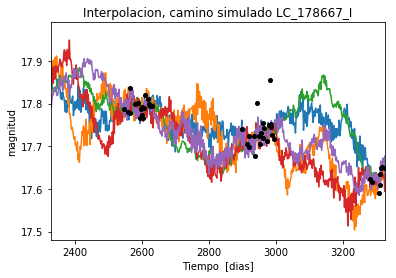

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_178667_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 246.639354161
Median: 0.00526319709168
Standard deviation: 0.0867151110767
68% credibility interval: [ 0.00169523  0.01644433]
95% credibility interval: [ 0.00052023  0.17509018]
99% credibility interval: [  3.53367647e-04   7.21506397e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 322.120061256
Median: 0.00493750751851
Standard deviation: 0.0661103390007
68% credibility interval: [ 0.00142889  0.01430521]
95% credibility interval: [ 0.00039983  0.06687049]
99% credibility interval: [  3.19226811e-04   6.75265055e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 101.782785614
Median: 0.321556559037
Standard deviation

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 196.826604545
Median: 141.672809217
Standard deviation: 2.86270267732
68% credibility interval: [ 138.48358583  143.63493354]
95% credibility interval: [ 133.53231077  145.1231903 ]
99% credibility interval: [ 131.20294634  145.77934428]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 181.651269334
Median: 2.19022241904
Standard deviation: 2.10279169479
68% credibility interval: [ 0.53517617  4.78417031]
95% credibility interval: [ 0.03219233  6.33047895]
99% credibility interval: [  0.01990372  12.47273061]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 315.89513293
Median: 2.57614409083
Standard deviation: 11.4582709321
68% credibility interval: [  1.67199397  23.85822634]
95% credibility interval: [  0.41497986  

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 2.09067054393e-19
Standard deviation: 8.78714126698e+50
68% credibility interval: [  1.03799344e-71   6.78525156e-01]
95% credibility interval: [  4.11750582e-104   1.03475121e+002]
99% credibility interval: [  5.05581998e-116   1.97897563e+013]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 792.596393258
Median: 17.7979081849
Standard deviation: 0.0444825772295
68% credibility interval: [ 17.75885412  17.83757478]
95% credibility interval: [ 17.71253016  17.88362351]
99% credibility interval: [ 17.68094067  17.97461044]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 81.95939706
Median: 0.232628128054
Standard deviation: 0.252026225143
68% credibility interval: [ 0.19475031  0.77609269]
95% credibility interval: [ 0.         0.8227641]
99% credibility interval: [ 0.          0.94065501]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 81.95939706
Median: 0.232628128054
Standard deviation: 0.252026225143
68% credibility interval: [ 0.19475031  0.77609269]
95% credibility interval: [ 0.         0.8227641]
99% credibility interval: [ 0.          0.94065501]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 530.712522744
Median: 0.0
Standard deviation: 0.000126933771438
68% credibility 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 196.826604545
Median: 141.672809217
Standard deviation: 2.86270267732
68% credibility interval: [ 138.48358583  143.63493354]
95% credibility interval: [ 133.53231077  145.1231903 ]
99% credibility interval: [ 131.20294634  145.77934428]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 309.648480506
Median: 0.00759053778702
Standard deviation: 0.0250143684524
68% credibility interval: [ 0.00501168  0.01198506]
95% credibility interval: [ 0.00357596  0.01986529]
99% credibility interval: [ 0.0028554   0.04369004]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 549.959293807
Median: 1.16185783528
Standard deviation: 0.259328145408
68% credibility interval: [ 0.95035459  1.44773234]
95% credibility interval: [ 0.78760984  1.8569971 ]
99% credibility interval: [ 0.7018177   1.96114083]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1231.02092102
Median: 0.0321375539925
Standard deviation: 0.20738018126
68% credibility interval: [ 0.00305573  0.26885848]
95% credibility interval: [  3.37353499e-05   7.44887759e-01]
99% credibility interval: [  6.18010450e-15   1.03072666e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 246.639354161
Median: (-0.0330696426353-1.70459568515j)
Standard deviation: 1.6746395549
68% credibility interval: [-0.10332276-1.33077309j -0.01065144-1.39791721j]
95% credibility interval: [-1.10012402-6.09701284j -0.00326868-0.11959917j]
99% credibility interval: [ -4.53335839e+00-5.37522759j  -2.22027441e-03-4.86005666j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 322.120061256
Median: (-0.0310232746944+0.953426070808j)
Standard deviation: 1.63710192856
68% credibility interval: [-0.08988226+4.57586803j -0.00897798+4.87313809j]
95% credibility interval: [-0.42015968 +1.01123535e+00j -0.00251219 +7.68827557e-05j]
99% credibility interval: [ -4.24281547e+00+5.87911947j  -2.00576121e-03+0.j        ]
Posterior summ